Nama : Ayu Wulandari

In [ ]:
#Mengimpor TensorFlow
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [9]:
#Mempersiapkan data
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-06-28 00:03:05--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip.1’

rockpaperscissors.z 100%[===================>] 307.92M  4.55MB/s    in 80s     

2021-06-28 00:04:27 (3.84 MB/s) - ‘rockpaperscissors.zip.1’ saved [322873683/322873683]



In [54]:
#Melakukan ekstrasi data pada file zip
import zipfile,os
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = os.path.join(base_dir, 'train')
validasi_dir = os.path.join(base_dir, 'validasi')

In [55]:
os.listdir(base_dir)

['README_rpc-cv-images.txt', 'scissors', 'paper', 'rock']

In [56]:
train_scissors_dir = os.path.join(train_dir, 'scissors')

train_paper_dir = os.path.join(train_dir, 'paper')

train_rock_dir = os.path.join(train_dir, 'rock')

validation_scissors_dir = os.path.join(validasi_dir, 'scissors')

validation_paper_dir = os.path.join(validasi_dir, 'paper')

validation_rock_dir = os.path.join(validasi_dir, 'rock')

In [64]:
train_datagen = ImageDataGenerator(
    horizontal_flip = True,
    validation_split = 0.4,
    shear_range = 0.4,
    zoom_range = 0.4,
    rescale = 1./255,
    rotation_range = 20,
    fill_mode = 'nearest'
)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [65]:
training_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (150, 200),
    shuffle = True,
    subset = 'training',
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (150, 200),
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [66]:
#Mengonfigurasi CNN untuk mempreoses input bentuk (150, 200,3)
modeling = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 200, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [67]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']
)

In [68]:
model.fit(
    training_generator,
    steps_per_epoch = 16,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = 6,
    verbose = 2
)

Epoch 1/15
16/16 - 36s - loss: 0.1102 - accuracy: 0.9564 - val_loss: 0.1939 - val_accuracy: 0.9219
Epoch 2/15
16/16 - 36s - loss: 0.1447 - accuracy: 0.9512 - val_loss: 0.0628 - val_accuracy: 0.9792
Epoch 3/15
16/16 - 36s - loss: 0.0864 - accuracy: 0.9727 - val_loss: 0.1156 - val_accuracy: 0.9688
Epoch 4/15
16/16 - 36s - loss: 0.0935 - accuracy: 0.9727 - val_loss: 0.0604 - val_accuracy: 0.9740
Epoch 5/15
16/16 - 36s - loss: 0.0395 - accuracy: 0.9863 - val_loss: 0.1671 - val_accuracy: 0.9688
Epoch 6/15
16/16 - 35s - loss: 0.1274 - accuracy: 0.9544 - val_loss: 0.1695 - val_accuracy: 0.9427
Epoch 7/15
16/16 - 36s - loss: 0.1190 - accuracy: 0.9648 - val_loss: 0.2224 - val_accuracy: 0.9479
Epoch 8/15
16/16 - 36s - loss: 0.0745 - accuracy: 0.9727 - val_loss: 0.0660 - val_accuracy: 0.9792
Epoch 9/15
16/16 - 36s - loss: 0.0494 - accuracy: 0.9824 - val_loss: 0.1612 - val_accuracy: 0.9427
Epoch 10/15
16/16 - 36s - loss: 0.0953 - accuracy: 0.9707 - val_loss: 0.0840 - val_accuracy: 0.9740
Epoch 11/

Saving WhatsApp Image 2021-06-28 at 08.01.17.jpeg to WhatsApp Image 2021-06-28 at 08.01.17 (8).jpeg
WhatsApp Image 2021-06-28 at 08.01.17.jpeg
paper


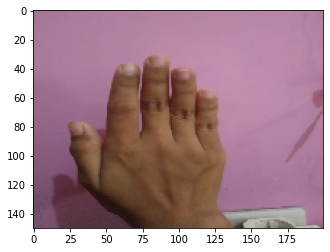

In [71]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for foto in uploaded.keys():
  path = foto
  img = image.load_img(path, target_size = (150,200))
  imgplot = plt.imshow(img)
  w = image.img_to_array(img)
  w = np.expand_dims(w, axis = 0)

  images = np.vstack([w])
  klasifikasi = model.predict(images, batch_size = 10)

  print(foto)
  if klasifikasi[0,0]!=0:
    print('paper')
  elif klasifikasi [0,1]!=0:
    print('rock')
  else:
    print('scissors')